In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [29]:
df = pd.read_csv('csv/application_credit_record_w_target.csv')
df_2 = pd.read_csv('csv/credit_record.csv')

In [30]:
print(df.columns)
#df['STATUS'] = df['STATUS'].map({'X': 6, 'C': 7})

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS', 'target'],
      dtype='object')


In [33]:
label_encoder = LabelEncoder()
df['STATUS'] = label_encoder.fit_transform(df['STATUS'])

C:\Users\WHPav\AppData\Local\Temp\ipykernel_10228\1269345991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='STATUS', palette='viridis', order=[6,0,7,1,2,3,4,5])


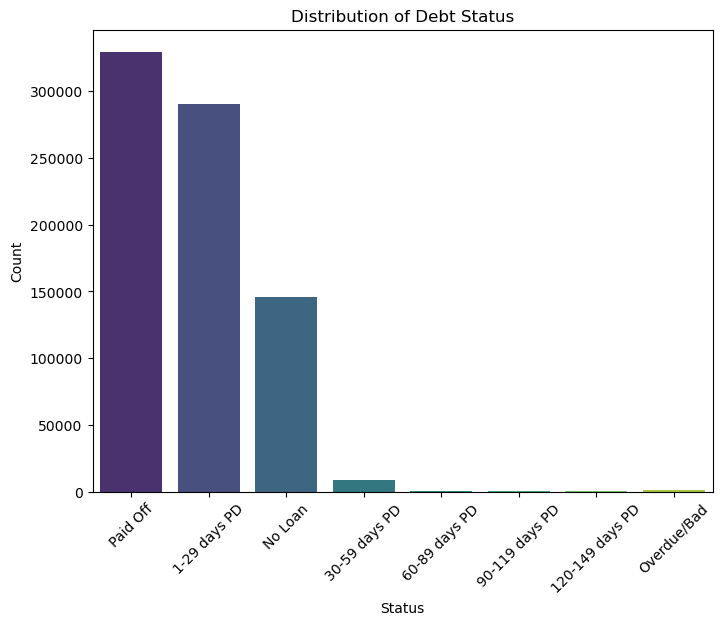

In [39]:
new_labels = ['Paid Off', '1-29 days PD', 'No Loan', '30-59 days PD', '60-89 days PD', '90-119 days PD', '120-149 days PD','Overdue/Bad']
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='STATUS', palette='viridis', order=[6,0,7,1,2,3,4,5])
plt.xticks(ticks=range(len(new_labels)), labels=new_labels,  rotation=45)
plt.title('Distribution of Debt Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# 0: 1-29 days past due
# 1: 30-59 days past due
# 2: 60-89 days overdue
# 3: 90-119 days overdue
# 4: 120-149 days overdue
# 5: Overdue or bad debts, write-offs for more than 150 days
# C: paid off that month
# X: No loan for the month

C:\Users\WHPav\AppData\Local\Temp\ipykernel_10228\2880377726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='STATUS', y='MONTHS_BALANCE', palette='viridis', order=[6,0,7,1,2,3,4,5])


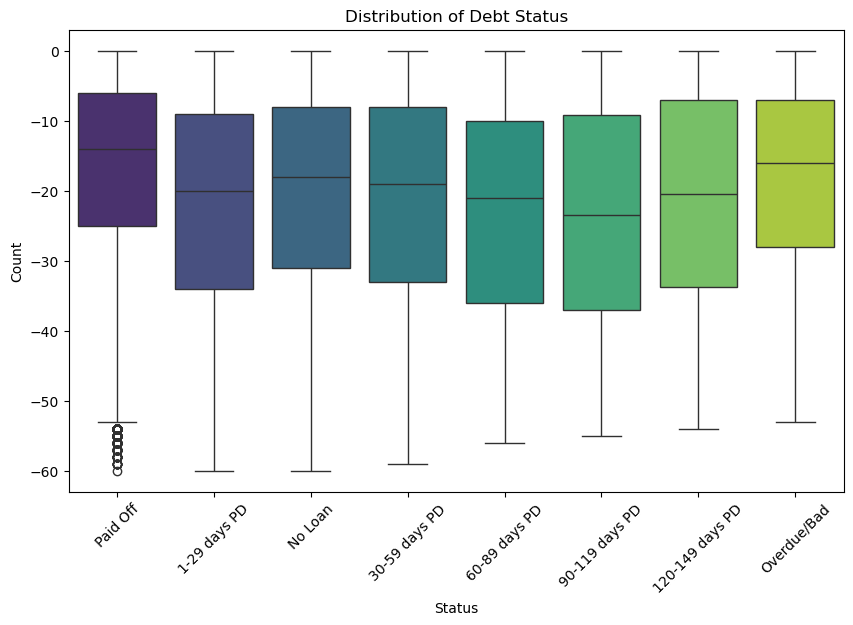

In [44]:
new_labels = ['Paid Off', '1-29 days PD', 'No Loan', '30-59 days PD', '60-89 days PD', '90-119 days PD', '120-149 days PD','Overdue/Bad']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='STATUS', y='MONTHS_BALANCE', palette='viridis', order=[6,0,7,1,2,3,4,5])
plt.xticks(ticks=range(len(new_labels)), labels=new_labels,  rotation=45)
plt.title('Distribution of Debt Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# 0: 1-29 days past due
# 1: 30-59 days past due
# 2: 60-89 days overdue
# 3: 90-119 days overdue
# 4: 120-149 days overdue
# 5: Overdue or bad debts, write-offs for more than 150 days
# C: paid off that month
# X: No loan for the month

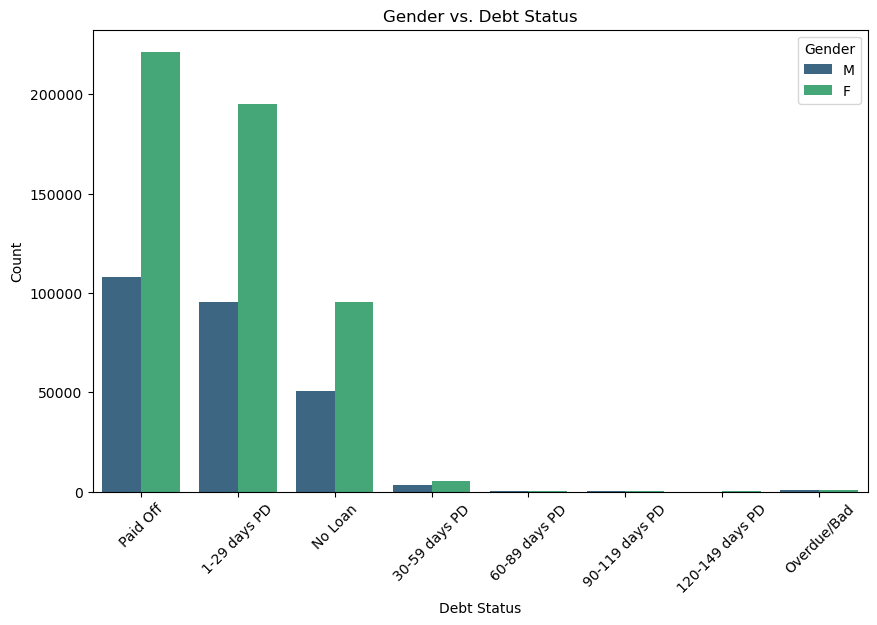

In [50]:
# Define new labels for the STATUS values
new_labels = ['Paid Off', '1-29 days PD', 'No Loan', '30-59 days PD', '60-89 days PD', '90-119 days PD', '120-149 days PD', 'Overdue/Bad']

# Create the countplot to compare gender across debt status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='STATUS', hue='CODE_GENDER', palette='viridis', order=[6, 0, 7, 1, 2, 3, 4, 5])

# Customize the x-axis labels with your new labels
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=45)

# Set plot title and axis labels
plt.title('Gender vs. Debt Status')
plt.xlabel('Debt Status')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()

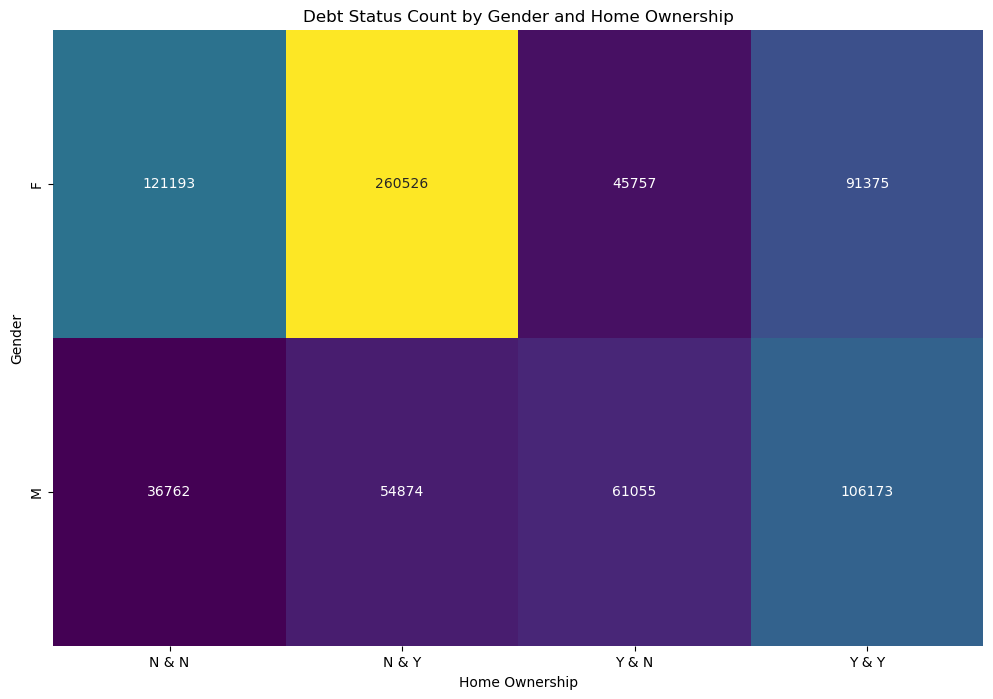

In [54]:
df['OWN_HOME'] = df['FLAG_OWN_CAR'].astype(str) + ' & ' + df['FLAG_OWN_REALTY'].astype(str)
pivot_data = pd.pivot_table(df, index='CODE_GENDER', columns='OWN_HOME', values='STATUS', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Debt Status Count by Gender and Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Gender')
plt.show()

# This shows a breakdown of each gender and the debt status of each gender in respects to asset ownership.
#more directly focusing on car ownership and home ownership and it's mix.
#N & N - They own neither
#N & Y - They own a Home only
#Y & N - They own a Car only
#Y & Y - They own both 



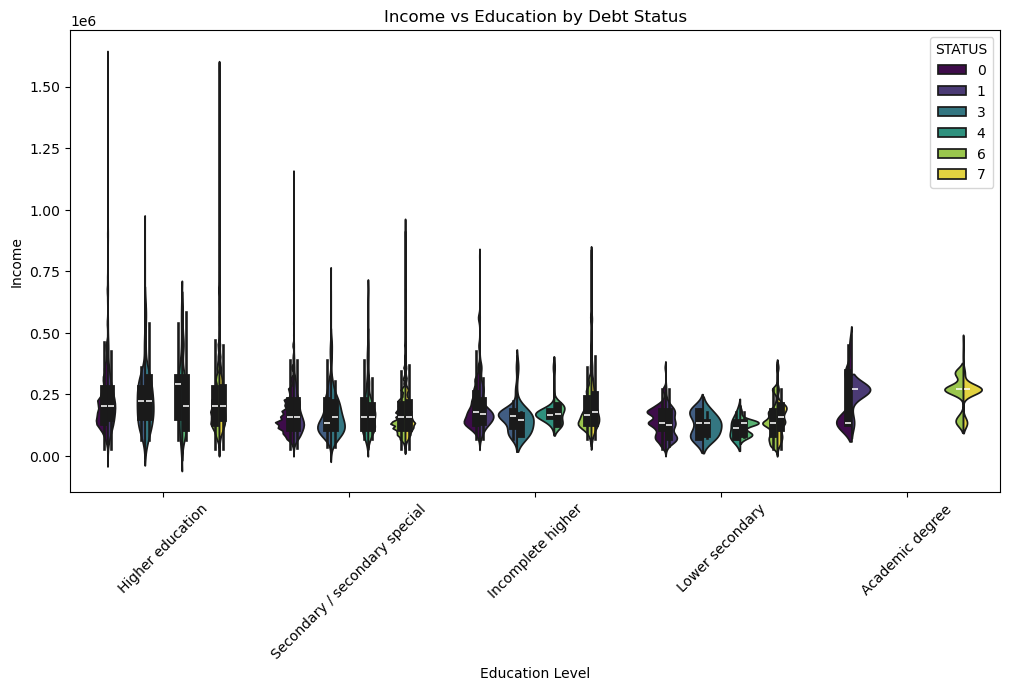

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='STATUS', split=True, palette='viridis')
plt.title('Income vs Education by Debt Status')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

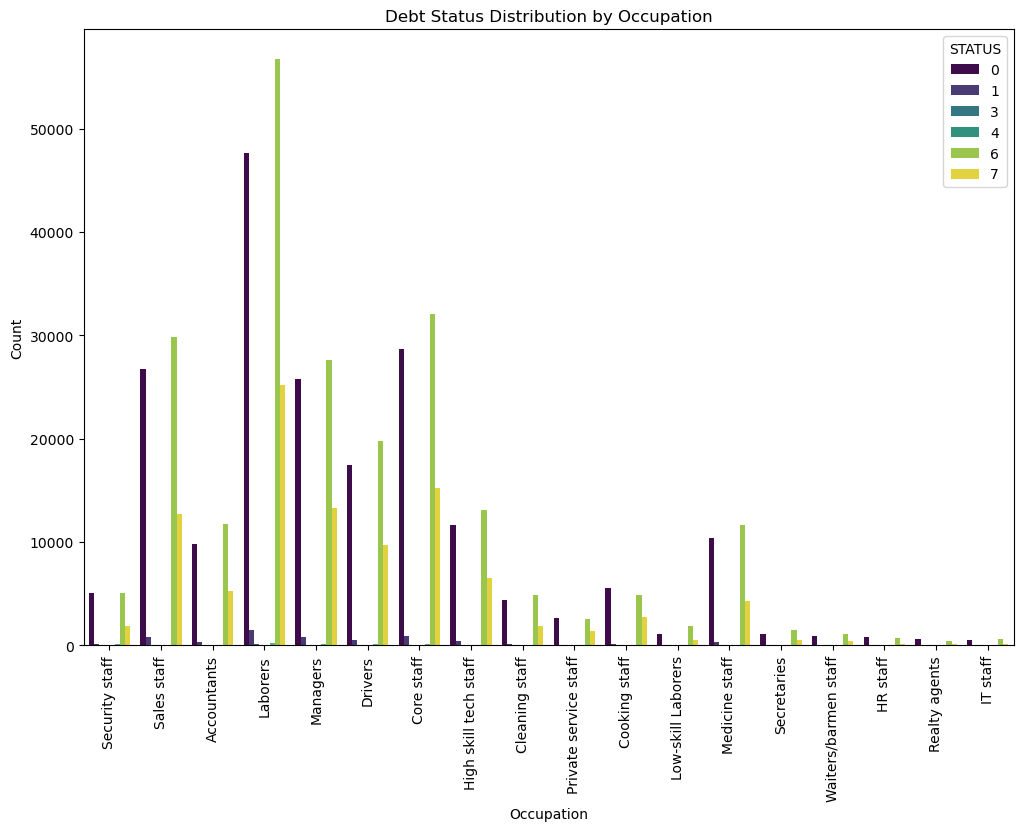

In [60]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='OCCUPATION_TYPE', hue='STATUS', palette='viridis')
plt.title('Debt Status Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()